In [1]:
import numpy as np
import keras
from keras import layers


In [3]:
# Prepare the data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_classes = 10
input_shape = 28 * 28


In [4]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


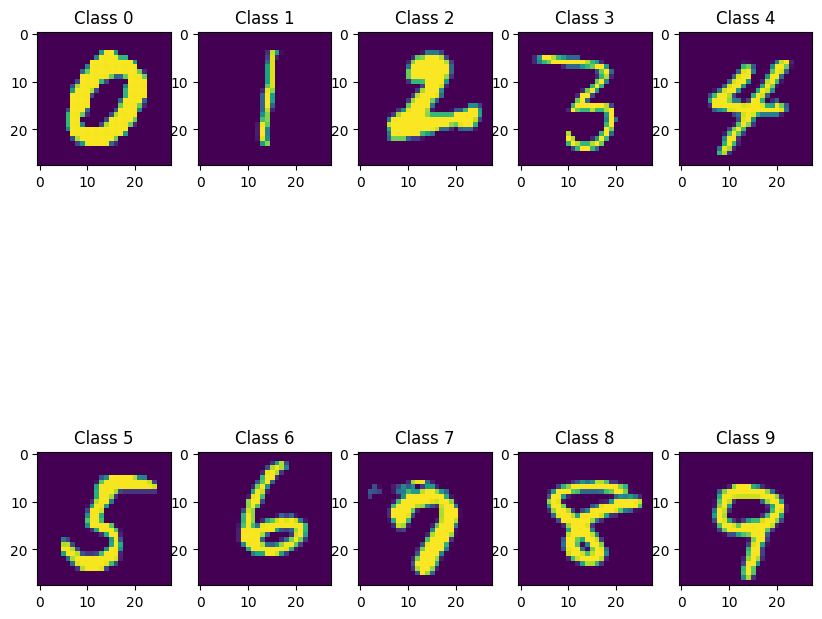

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit = np.random.randint(1,1000)
    plt.imshow(x_train[np.where(y_train == i)[0][digit]])
    plt.title("Class {}".format(i))
plt.show()


In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


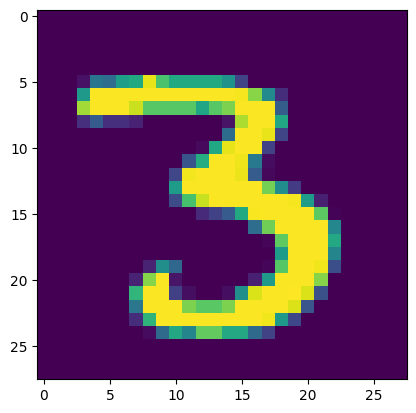

In [9]:
plt.imshow(x_train[12])

In [10]:
y_train[12]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [12]:
x_train = x_train.reshape(-1, input_shape)
x_test  = x_test.reshape(-1, input_shape)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [13]:
# Build the model (sequential)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
# step 1 compilation

batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



# step 2 model fitting

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25)


Epoch 1/30
352/352 [==============================] - 3s 5ms/step - loss: 0.6911 - accuracy: 0.7816 - val_loss: 0.2264 - val_accuracy: 0.9338
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 0.3265 - accuracy: 0.9072 - val_loss: 0.1638 - val_accuracy: 0.9520
Epoch 3/30
352/352 [==============================] - 1s 4ms/step - loss: 0.2521 - accuracy: 0.9285 - val_loss: 0.1390 - val_accuracy: 0.9595
Epoch 4/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2133 - accuracy: 0.9399 - val_loss: 0.1223 - val_accuracy: 0.9645
Epoch 5/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1884 - accuracy: 0.9478 - val_loss: 0.1192 - val_accuracy: 0.9644
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1716 - accuracy: 0.9515 - val_loss: 0.1097 - val_accuracy: 0.9679
Epoch 7/30
352/352 [==============================] - 2s 7ms/step - loss: 0.1608 - accuracy: 0.9567 - val_loss: 0.1071 - val_accuracy: 0.9689
Epoch 

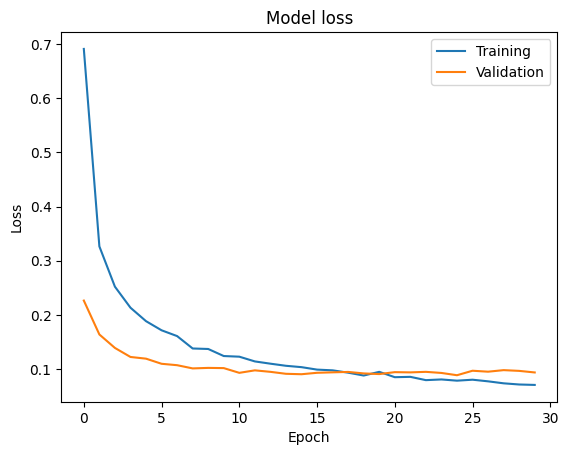

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9782


[0.08620543032884598, 0.9782000184059143]

In [21]:
'''
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(256, activation="sigmoid"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="sigmoid"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
'''


input = layers.Input(shape=input_shape)
x = layers.Dense(256, activation="sigmoid")(input)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="sigmoid")(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation="softmax")(x)

model1 = keras.models.Model(input, output)
model1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (85

In [26]:
# Callbacks

callbacks=[keras.callbacks.EarlyStopping(patience=10),
           keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True),
           keras.callbacks.ReduceLROnPlateau()]



In [27]:
batch_size = 128
epochs = 1000

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, callbacks = callbacks)


Epoch 1/1000
352/352 [==============================] - 3s 6ms/step - loss: 1.2681 - accuracy: 0.5977 - val_loss: 0.4591 - val_accuracy: 0.8881 - lr: 0.0010
Epoch 2/1000
 43/352 [==>...........................] - ETA: 1s - loss: 0.6805 - accuracy: 0.8060

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.8434 - val_loss: 0.3027 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 3/1000
352/352 [==============================] - 2s 4ms/step - loss: 0.4302 - accuracy: 0.8801 - val_loss: 0.2531 - val_accuracy: 0.9267 - lr: 0.0010
Epoch 4/1000
352/352 [==============================] - 2s 4ms/step - loss: 0.3696 - accuracy: 0.8976 - val_loss: 0.2214 - val_accuracy: 0.9329 - lr: 0.0010
Epoch 5/1000
352/352 [==============================] - 3s 9ms/step - loss: 0.3268 - accuracy: 0.9085 - val_loss: 0.2019 - val_accuracy: 0.9396 - lr: 0.0010
Epoch 6/1000
352/352 [==============================] - 3s 9ms/step - loss: 0.2935 - accuracy: 0.9190 - val_loss: 0.1842 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 7/1000
352/352 [==============================] - 3s 8ms/step - loss: 0.2686 - accuracy: 0.9244 - val_loss: 0.1747 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 8/1000
352/352 [==============================] - 3s 8ms/step - l

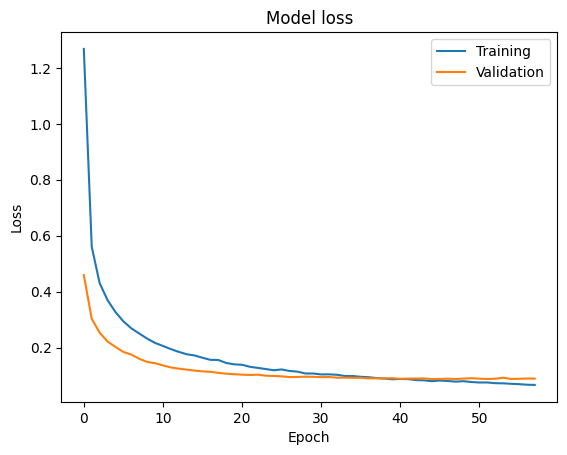

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [29]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9789


[0.07699590176343918, 0.9789000153541565]

In [48]:
import keras_tuner as kt

def model_builder(hp):
    input = layers.Input(shape=input_shape)
    x = layers.Dense(hp.Int('units_1', min_value=32, max_value=512, step=32), activation="relu")(input)
    x = layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = layers.Dense(hp.Int('units_2', min_value=32, max_value=512, step=32), activation="relu")(x)
    x = layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)
    output = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.models.Model(input, output)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=3)


Reloading Tuner from ./untitled_project/tuner0.json


In [40]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.25)
best_model = tuner.get_best_models()[0]


Trial 3 Complete [00h 01m 23s]
val_loss: 0.08772832155227661

Best val_loss So Far: 0.08744309842586517
Total elapsed time: 00h 04m 10s


In [41]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 384)               301440    
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 503690 (1.92 MB)
Trainable params: 503690 (1.92

In [47]:
best_params = tuner.get_best_hyperparameters()[0].values
print(best_params)


{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 512, 'dropout_2': 0.30000000000000004}
